# Query AWS Athena for summary stats on Potlatch


In [2]:
import seaborn as sns
import pandas as pd
import datetime, sys
import matplotlib, statistics

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## First, pull all changesets from Athena (using the AWS OSM Public Dataset)

```sql
SELECT date_trunc('month', created_at) as month, count(distinct(uid)) as users, count(id) as changesets, sum(num_changes) as edits
FROM changesets
WHERE lower(tags['created_by']) LIKE '%potlatch%'
GROUP BY  date_trunc('month', created_at)
ORDER BY  date_trunc('month', created_at) desc
```

In [3]:
df = pd.read_csv('./data/potlatch_edits_weekly.csv')
df['week'] = df.week.apply(lambda t: pd.Timestamp(t).date())
df.head(2)

,week,users,changesets,edits
0,2009-04-20,4501,41915,903575
1,2009-04-27,4703,42481,1119373


# How much is Potlatch being used over time?

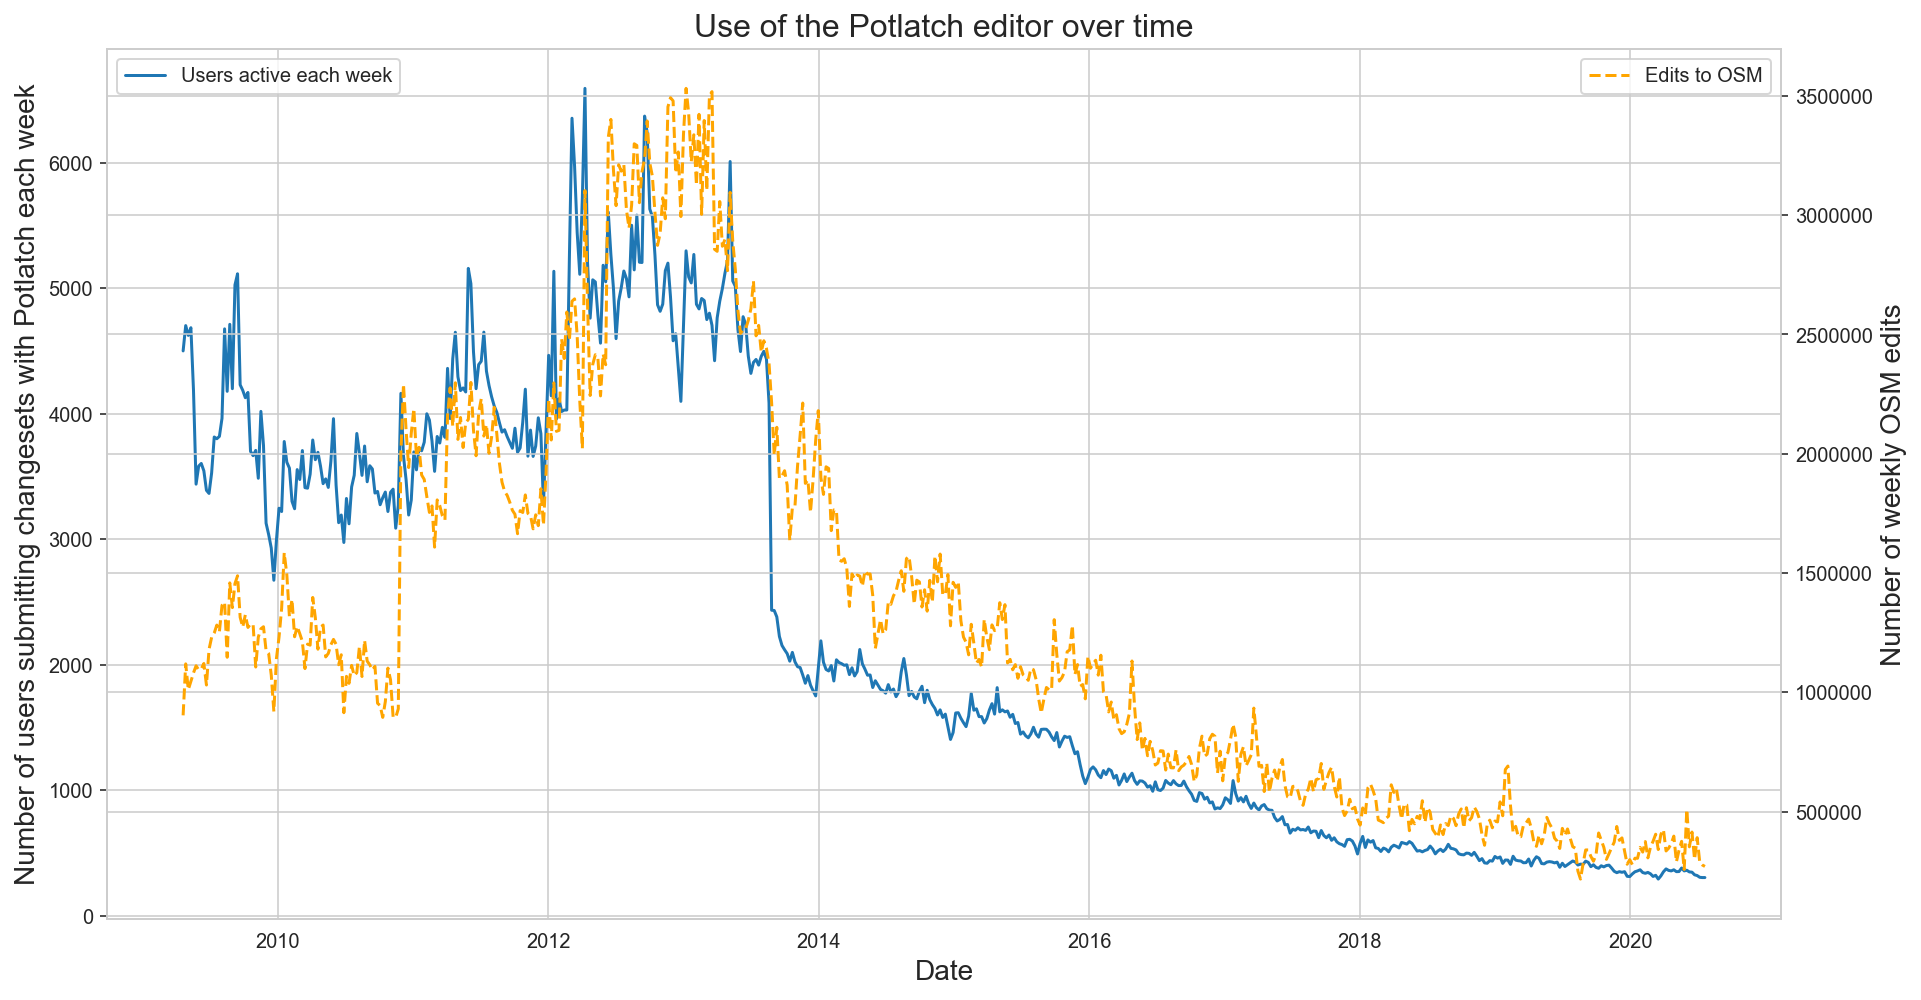

In [4]:
sns.set_style("whitegrid")

ax = df.set_index('week')['users'].plot(figsize=(15,8), style="-")

ax.set_ylabel("Number of users submitting changesets with Potlatch each week", fontsize=14);
ax.set_xlabel("Date", fontsize=14);
ax.set_title("Use of the Potlatch editor over time", fontsize=16);

ax2 = ax.twinx(); 
df.set_index('week')['edits'].plot(figsize=(15,8), style="--", ax=ax2, color='orange')

ax2.set_ylabel("Number of weekly OSM edits", fontsize=14)

ax.legend(['Users active each week'], loc='upper left'); 
ax2.legend(['Edits to OSM'], loc='upper right');

In [6]:
print("The last 25 weeks of Potlatch Stats: ")
df.sort_values(by='week',ascending=False).head(25)

The last 25 weeks of Potlatch Stats: 


,week,users,changesets,edits
587,2020-07-20,303,1697,270278
586,2020-07-13,303,1882,276405
585,2020-07-06,305,2197,287372
584,2020-06-29,319,2350,390981
583,2020-06-22,325,2216,299726
582,2020-06-15,346,2783,414455
581,2020-06-08,348,3303,352420
580,2020-06-01,361,3378,508794
579,2020-05-25,356,2718,257655
578,2020-05-18,379,3042,375535
